<a href="https://colab.research.google.com/github/pramod1997/submission_data_sciece/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score , accuracy_score , confusion_matrix , roc_curve , auc

In [0]:
df = pd.read_csv('new_processed_data.csv')

In [0]:
### drop columns with target value --> 2 
df.drop(df[df['pymt_standing']==2].index , inplace = True)

In [0]:
feature = [x for x in df.columns if x not in ['pymt_standing']]
Y = df['pymt_standing']
X = df[feature]

In [0]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.2)

In [0]:
param_grid = {
      'C': [0.001, 0.01, 0.1, 1, 10,100],
      'gamma' : [0.001, 0.01, 0.1, 1]
    }
clf = GridSearchCV(SVC(kernel = 'rbf',class_weight='balanced') , param_grid ,cv =5 )


In [7]:
clf.fit(X_train,Y_train) ##3 fitting it

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [8]:
clf.best_params_

{'C': 0.1, 'gamma': 0.01}

In [0]:
model = SVC(C=0.1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01,
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)  ## prob = True , class weight = balanced

In [17]:
model.fit(X_train,Y_train)

SVC(C=0.1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
roc_score = roc_auc_score(Y_test,model.predict_proba(X_test)[:,1])
roc_score

0.9999428538773644

In [19]:
prediction = model.predict(X_test)
confusion_matrix(Y_test , prediction)


array([[ 57,   0],
       [  2, 305]])

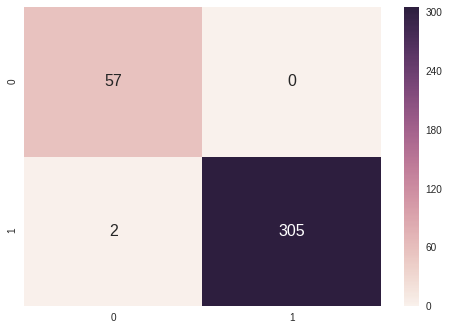

In [20]:
##plotting confusion matrix 
array = confusion_matrix(Y_test,prediction)
df_cm = pd.DataFrame(array, [0,1],
                  [0,1])
#plt.figure(figsize = (10,7))
plt.xlabel('Predicted')
plt.ylabel('Actual Label')
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16} ,fmt='g')# font size

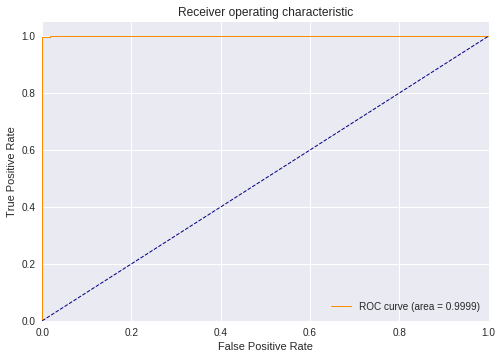

In [21]:
## plot roc curve
###  

target = Y_test
prediction = model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve( target,prediction)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [0]:
#np.array(np.unique(Y_test, return_counts=True))